# Import Library

In [1]:
import xarray as xr #It is particularly tailored to working with netCDF files
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


In [3]:
#Long Term Mean Average Monthly Rate of Precipitation
path = './precip.mon.ltm.nc' #상대경로

ncfile = xr.open_dataset(path)
print(ncfile) #print ncfile data set info

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon                 (lon) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/17)
    Conventions:                    CF-1.0
    curator:                        Dr. Jian-Jian Wang\nESSIC, University of ...
    description:                    http://eagle1.umd.edu/GPCP_ICDR/GPCPmonth...
    citation:                       Adler, R.F., G.J. Huffman, A. Chang, R. F...
    title:                          GPCP Version 2.3 Combined Precipitation D...
    platform:                       NOAA POES (Polar Orbitin

C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


# Data Processing

In [7]:
#select variable
precip = ncfile.data_vars['precip']
print(precip.shape) #precip의 dimesion보여준다 [time, lat, lon]

(12, 72, 144)


In [9]:
#check null value
np.sum(np.isnan(precip))

<xarray.DataArray 'precip' ()>
array(0)

In [14]:
print(precip.lon) #longitude 단위 확인
amazon_lon = 300 #longitude가 0~360단위이므로 서경 60도를 300도로 변환
amazon_lat = -3 #남위 5도
precip_amazon = precip.sel(lon = amazon_lon, lat = amazon_lat, method = 'nearest' )
#neareast는 우리가 설정한 lon, lat와 가장 가까운 station 값으로 알아서 lon, lat값을 조정해줌. 
#more info. https://xarray.pydata.org/en/stable/user-guide/indexing.html 참조.

precip_amazon #설정한 좌표(여기서는 amazon) 에 대한 data 값이 array에 잘 저장되었는지 확인. 

<xarray.DataArray 'lon' (lon: 144)>
array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75,
        91.25,  93.75,  96.25,  98.75, 101.25, 103.75, 106.25, 108.75, 111.25,
       113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75,
       136.25, 138.75, 141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25,
       158.75, 161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75, 201.25,
       203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75, 221.25, 223.75,
       226.25, 228.75, 231.25, 233.75, 236.25, 238.75, 241.25, 243.75, 246.25,
       248.75, 251.25, 253.75, 256.25, 258.75, 261.25, 263.75, 266.25, 268.75,
       271.25, 2

<xarray.DataArray 'precip' (time: 12)>
array([ 9.333232,  9.859019, 10.391429, 10.135906,  7.825685,  4.634763,
        3.064074,  2.689785,  3.186242,  4.009714,  5.241088,  7.102516],
      dtype=float32)
Coordinates:
    lat      float32 -3.75
    lon      float32 301.2
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    long_name:     Long Term Mean Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Long Term Mean
    parent_stat:   Mean
    actual_range:  [5.6044193e-04 3.0161072e+01]

# visualization

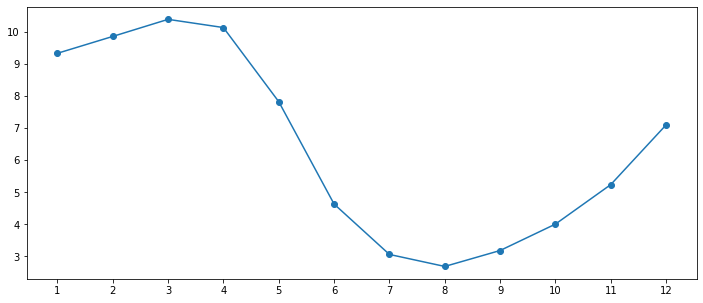

In [26]:
# # of figure and size
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize=(12 , 5))
#subplots | 행, 열의 개수를 인자로 받아서 (figure, axes)의 쌍을 리턴한다.
# subplots과 subplot more info. https://wikidocs.net/14604 
# https://jm-baek.tistory.com/12 참조

#axes랑 axis | https://wikidocs.net/14604

month = [ x for x in range(1,13)]
#or month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT','NOV','DEC']

ax.plot(month, precip_amazon, marker = 'o')
#matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
#more info. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html 참조

plt.xticks(np.arange(min(month), max(month)+1, 1.0))
#x축 간격 1 로 설정하기. 
#https://stackabuse.com/change-tick-frequency-in-matplotlib/

plt.show()


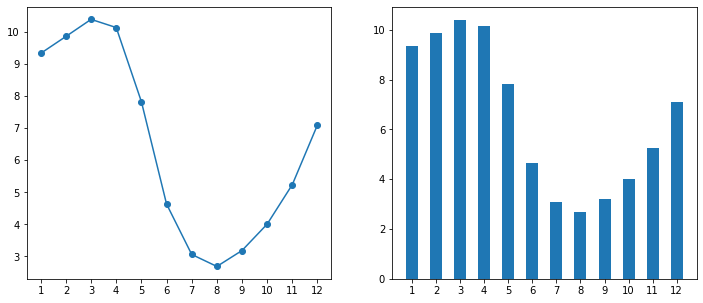

In [54]:
# #of figure and sixe
nrow = 1
ncol = 2
fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize=(12,5))
#ax는 1X2 모습의 행렬을 갖게 된다.  ax[0] ax[1] 
# subplots | https://url.kr/bocmtk

month = [ x for x in range(1,13)]
#month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT','NOV','DEC']

ax[0].plot(month, precip_amazon,marker='o')
#꺾은선 그래프
ax[1].bar(month, precip_amazon, width= 0.5)
#막대 그래프 


for axes in ax:
    axes.set_xticks(np.arange(1,len(month)+1, 1))
#각 axes의 x축 간격 1 로 설정하기.     
#more  info. https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib 참고. 

plt.show()


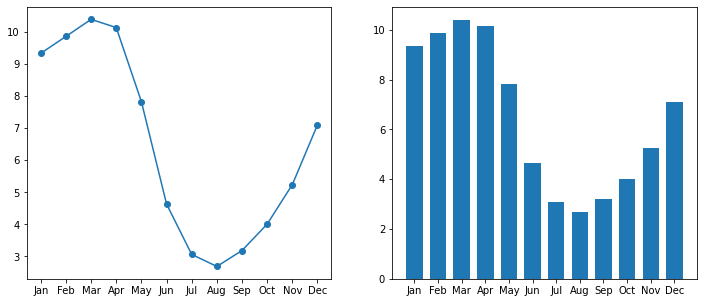

In [55]:
#이건 락훈오빠 방법. 결과는 동일!

# # of figure and size
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# There are many other techniques to set xaxis, but here let's take a simple way
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax1.plot(month, precip_amazon, marker='o')
ax2.bar(month, precip_amazon, width=0.7)

plt.show()